In [78]:
import os
import joblib
import pickle
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import mtcnn
from keras_vggface.vggface import VGGFace
from tensorflow.keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

In [74]:
face_dict=joblib.load(open('faces_embedding.pkl','rb'))

In [75]:
mtcnn_model=mtcnn.MTCNN()

In [76]:
model=VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

Enter filename: Shubham
images/6f4cb.JPG
images/dgsg.JPG
images/dsgfsd.JPG
images/dsgsd.JPG
images/ghjkfyj.JPG


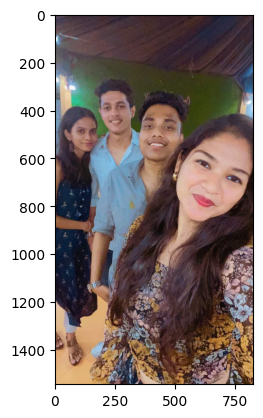

images/gykgyj.JPG
images/hdfgh.JPG
images/hjlui.JPG
images/IMG_0097.JPG


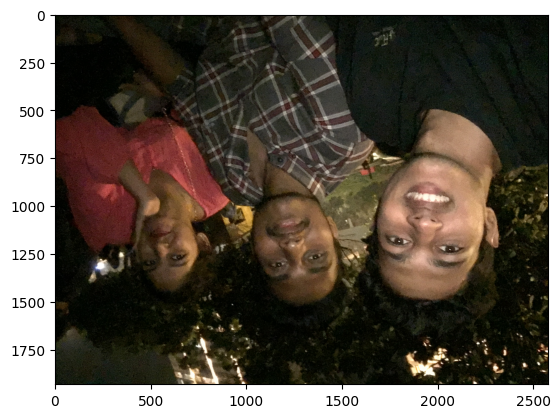

images/IMG_0098.JPG


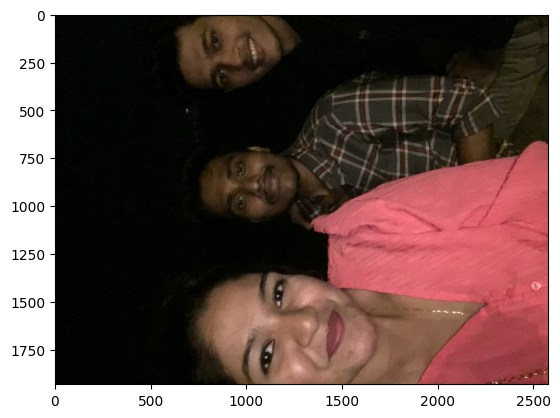

images/IMG_0131.JPG
images/IMG_0132.JPG
images/IMG_0140.jpg


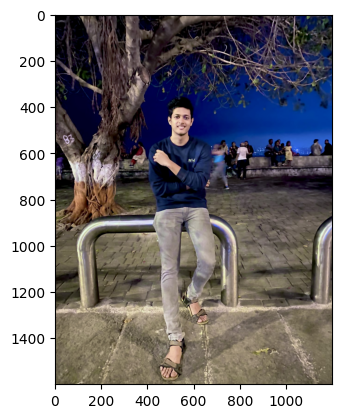

images/IMG_0141.JPG


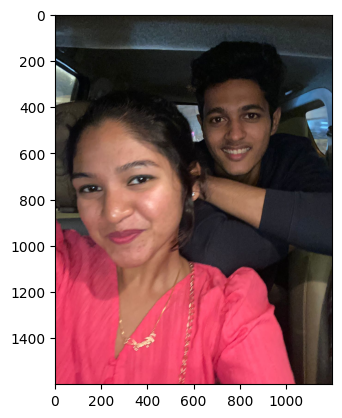

images/IMG_0142.JPG


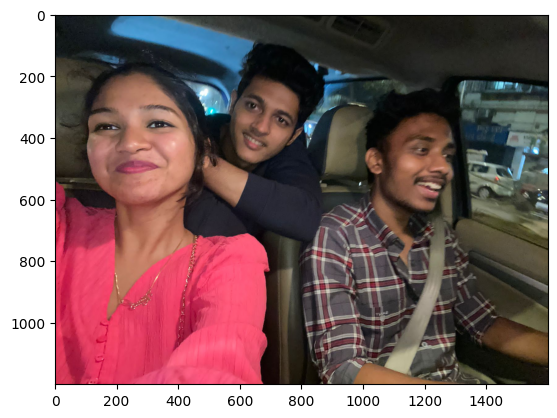

images/IMG_0143.JPG


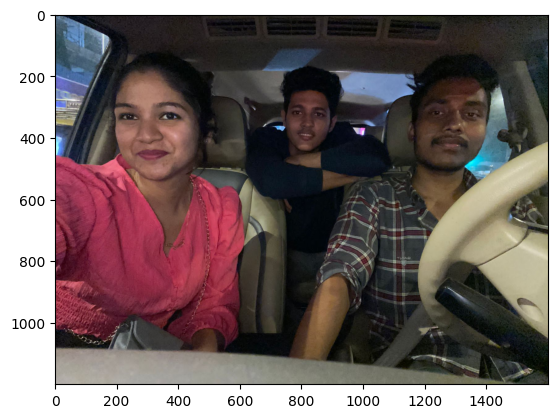

images/IMG_0150.JPG


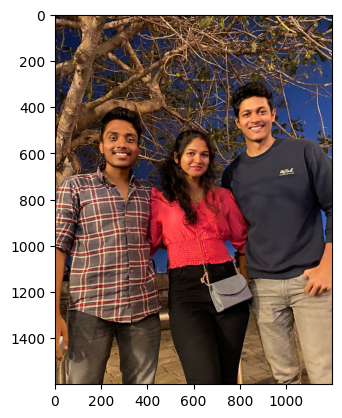

images/IMG_0151.JPG


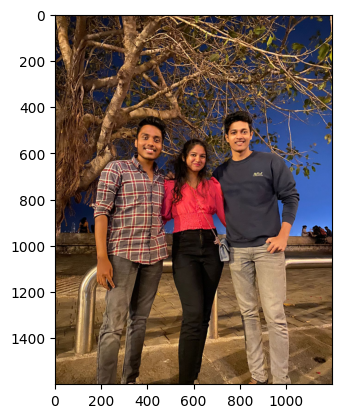

images/IMG_0152.JPG


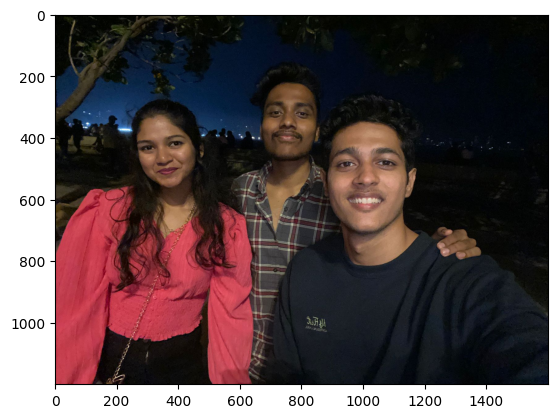

images/IMG_0153.JPG


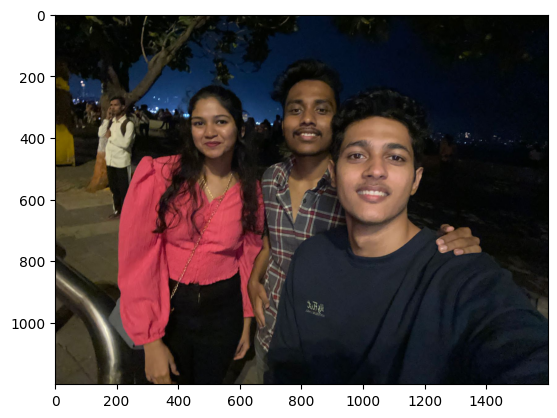

images/IMG_0154.JPG


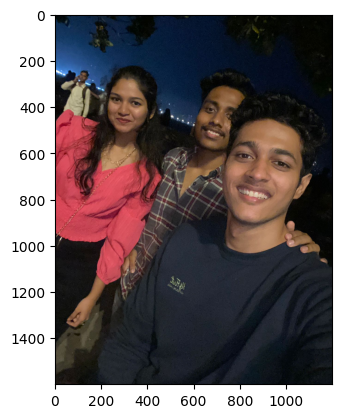

images/IMG_0155.JPG


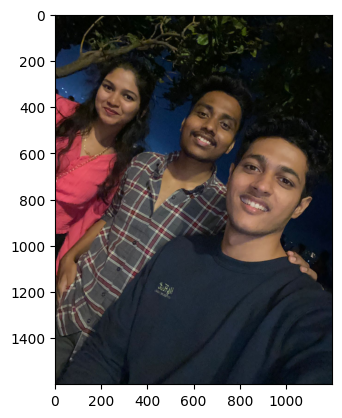

images/IMG_0157.JPG


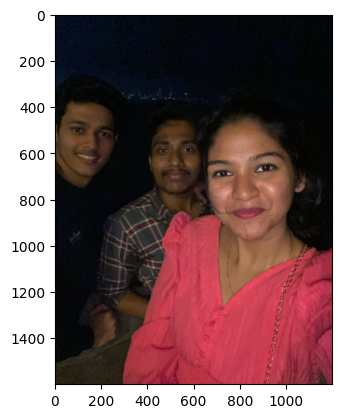

images/IMG_0158.JPG
images/IMG_0159.JPG


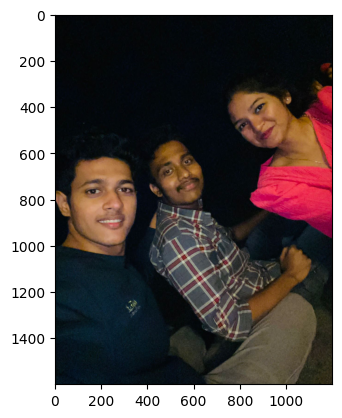

images/IMG_0280.JPG
images/IMG_0343.JPG


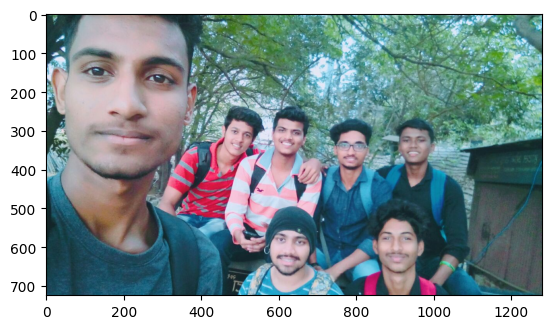

images/kgk.JPG
images/ygkvgyk.JPG


In [79]:
selfie=input('Enter filename: ')
img_name='Selfie/'+selfie+'.jpg'

img=cv2.imread(img_name)

face_box=mtcnn_model.detect_faces(img)
x1,y1,w,h=face_box[0]['box']
cropped_face=img[y1:y1+h,x1:x1+w]
cropped_face=cv2.resize(cropped_face,(224,224))
cropped_face=image.img_to_array(cropped_face)
cropped_face=np.expand_dims(cropped_face,axis=0)
cropped_face=preprocess_input(cropped_face)

emb=model.predict(cropped_face)


for file,embeds in face_dict.items():
    print(file)
    #jpg=cv2.imread(file)
    #plt.imshow(jpg)
    #plt.show()
    #print('\n\n\n\n')
    for j in embeds:
        simi=cosine_similarity(j,emb)
        if simi > 0.65:
            dis_img=Image.open(file)
            plt.imshow(dis_img)
            plt.show()